# An Analysis of Central Park Squirrels in 2018

### Tiffanie Choi

## Outline

#### 1. Introduction
   - 1A. Project Overview
   - 1B. Libraries
    
#### 2. Data Collection
   - 2A. Dataset Background Information
   - 2B. Data Preperation
       - Load the Data
       - View the Data
       - Clean the Data
    
#### 3. Data Visualization 
   - 3A. Visualize the area on a Map
   - 3B. Visualize Squirrel Ages on a Map
   - 3C. Visualize Squirrel Fur Colors on a Map
   - 3D. Visualize Squirrel Sighting Times on a Map
    
#### 4. Data Analysis
   - 4A. Are there more adults or baby squirrels in Central Park, NY? 
   - 4B. What is the geographic spread of squirrel color fur in Central Park, NY?
   - 4C. What is the most common time for squirrel sightings in Central Park, NY? 
   - 4D. Is there a correlation between a squirrel's age and their actions (and/or interactions with humans)?
    
#### 5. Machine Learning
   - 5A. Training the Data
   - 5B. Building the Model
       - K-Nearest Neighbors Classifier
       - Decision Tree Classifier
    
#### 6. Conclusion
   - 6A. Key Takeaways
   - 6B. Future Questions
    
    
    


## Introduction

### 1A. Project Overview

The objective of this project is to analyze Central Park Squirrels in 2018 to see common patterns of squirrel traits/characteristics seen during sightings, if there is any correlation and/or relationship between squirrel characteristics and their interactions with humans, and dive into predictive modeling with Central Park Squirrel data.

### 1B. Libraries 

- folium
    - Visualize data through maps
- pandas
    - Load and modify dataframes
- numpy
    - For many computations and calculations
- seaborn
    - Used for creating plots
- matplotlib
    - Used for modifying plots
- sklearn
    - For predictive modeling

In [381]:
import folium
import pandas
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt 
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## Data Collection

### 2A. Dataset Background Information

NYC OpenData and The Squirrel Census provided data on 2018 Central Park Squirrel Census on (https://data.cityofnewyork.us/Environment/2018-Central-Park-Squirrel-Census-Squirrel-Data/vfnx-vebw). This dataset provides information about squirrel data for each of the 3,023 sightings, including location coordinates, age, primary and secondary fur color, elevation, activities, communications, and interactions between squirrels and with humans.

### 2B. Data Preperation: Load the Data

Use pandas to read in the csv file (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html), and save it into a dataframe

In [382]:
df = pandas.read_csv("2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv")

### 2B. Data Preperation: View the Data

View the first 50 rows of the dataframe to view the columns and a sample of the data.

In [383]:
df.head(50)

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)
5,-73.968361,40.772591,11H-AM-1010-03,11H,AM,10102018,3,Adult,Cinnamon,White,...,False,False,False,False,True,False,True,False,NaN,POINT (-73.9683613516225 40.7725908847499)
6,-73.954120,40.793181,36H-AM-1010-02,36H,AM,10102018,2,Adult,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9541201789795 40.7931811701082)
7,-73.958269,40.791737,33F-AM-1008-02,33F,AM,10082018,2,Adult,Gray,NaN,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9582694312289 40.7917367820255)
8,-73.967429,40.782972,21C-PM-1006-01,21C,PM,10062018,1,Adult,Gray,NaN,...,False,False,False,True,True,False,False,False,NaN,POINT (-73.9674285955293 40.7829723919744)
9,-73.972250,40.774288,11D-AM-1010-03,11D,AM,10102018,3,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9722500196844 40.7742879599026)


### 2B. Data Preperation: Clean the Data

We can see above that since there are so many columns, we are not able to see all of it. Lets drop the columns we will not be using to make it easier to view the dataframe later on when we create models. Use df.drop (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) to remove columns we will not be using. Then only take a sample of 500 entries to avoid map clustering.

In [384]:
dropped_columns = ['Unique Squirrel ID', 'Indifferent', 'Eating', 'Above Ground Sighter Measurement', 
                   'Hectare', 'Hectare Squirrel Number', 'Combination of Primary and Highlight Color', 
                   'Color notes', 'Specific Location', 'Other Activities', 'Other Interactions', 'Lat/Long']

df = df.drop(dropped_columns, axis = 1)

sample_df = df.sample(100)

sample_df

,X,Y,Shift,Date,Age,Primary Fur Color,Highlight Fur Color,Location,Running,Chasing,Climbing,Foraging,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Runs from
2731,-73.969419,40.778719,AM,10072018,Adult,Cinnamon,White,Ground Plane,True,False,False,True,False,False,False,False,False,False,False
359,-73.961482,40.791293,PM,10132018,Adult,Gray,NaN,Ground Plane,False,True,False,False,False,False,False,False,True,False,False
1143,-73.961145,40.791100,AM,10132018,Adult,Cinnamon,Gray,Above Ground,False,False,True,False,False,False,False,False,False,False,False
1545,-73.966921,40.779277,PM,10082018,Adult,Gray,White,Ground Plane,False,False,False,False,False,False,False,False,True,False,False
2611,-73.971167,40.774798,PM,10182018,Adult,Cinnamon,NaN,Ground Plane,False,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,-73.969417,40.769779,PM,10132018,Adult,Gray,"Cinnamon, White",Ground Plane,False,False,False,True,False,False,False,False,False,False,False
1114,-73.972985,40.774071,AM,10082018,Adult,Gray,White,Above Ground,False,False,True,False,False,False,False,False,False,False,False
280,-73.970158,40.773097,PM,10172018,Adult,Gray,Cinnamon,Ground Plane,False,False,False,True,False,False,False,False,False,False,False
2061,-73.954476,40.796965,PM,10062018,Adult,Gray,Cinnamon,Ground Plane,False,False,False,False,False,False,False,False,False,False,False


## 3. Data Visualization

### 3A. Visualize the area on a Map

Using folium, lets create a map over Central Park, NY with latitude and longitude coordinates of (40.785091, -73.968285).    

Here is more info on this tool: http://python-visualization.github.io/folium/

In [385]:
map_osm = folium.Map(location = [40.785091, -73.968285], zoom_start = 14)
map_osm

### 3B. Visualize Squirrel Ages on a Map

Lets see common squirrel ages in this area. We can use numpy to list all of the age types, use those each value in the unique list as a key in a dictionary to translate age type keys to value. We can also create a dictionary for each age type.

In [386]:
# Find all ages
all_ages = np.unique(sample_df["Age"].astype(str))

print(all_ages)

# Clarify key names
age_dict = {'?': 'Unknown', 'Adult': 'Adult', 'Juvenile': 'Baby', 'nan': 'Undefined'}

# Create map 
map_osm_1 = folium.Map(location = [40.782511195076395, -73.9639744005647], zoom_start = 13.5)

# Map icons and color are dependent on age
age_icon = {'Unknown': 'question', 'Adult': 'play', 'Baby': 'circle', 'Undefined': 'times'}
age_color = {'Unknown': 'red', 'Adult': 'blue', 'Baby': 'green', 'Undefined': 'purple'}

# Traverse througn data sample 
for idx, row in sample_df.iterrows():
    
    # Get the current age and location
    age = age_dict[str(sample_df.at[idx, 'Age'])]
    location = [row['Y'], row['X']]
    
    # Get the description with important information from the squirrel sighting
    description = 'Age: ' + str(age) + \
    ', Date: ' + str(sample_df.at[idx, 'Date']) + \
    ', Fur Color: ' + str(sample_df.at[idx, 'Primary Fur Color']) + \
    ', Location: ' + str(sample_df.at[idx, 'Location']) + \
    ', Coordinates: ' + str(location)
    
    # Plot the marker on the map 
    folium.Marker(
        location = location,
        popup = description,
        icon = folium.Icon(color = age_color[age], icon = age_icon[age], prefix = 'fa'),
    ).add_to(map_osm_1)   

['Adult' 'Juvenile' 'nan']


In [387]:
map_osm_1

Marker Color and Icon Key: [Adult Squirrel: Blue color with triangle icon, Baby Squirrel: Green color with circle icon, Unknown Age: Red color with a question mark icon, Undefined Age: Purple color with a x icon]

We can observe that there are mainly adult squirrels represented on this map above.

### 3C. Visualize Squirrel Fur Colors on a Map

Lets see what squirrel primary fur colors appear most in this area. We can use numpy to list all of the primary fur colors types, use those each value in the unique list as a key in a dictionary to translate primary fur colors type keys to value. We can also create a dictionary for each primary fur color type.

In [388]:
# Find all fur colors
all_fur_color = np.unique(sample_df["Primary Fur Color"].astype(str))

print(all_fur_color)

# Clarify key names
fur_color_dict = {'Black': 'Black', 'Cinnamon': 'Cinnamon', 'Gray': 'Gray', 'nan': 'Undefined'}

# Create map 
map_osm_2 = folium.Map(location = [40.782511195076395, -73.9639744005647], zoom_start = 13.5)

# Map marker colors are dependent on fur color
fur_map_color = {'Black': 'black', 'Cinnamon': 'beige', 'Gray': 'lightgray', 'Undefined': 'white'}

# Traverse througn data sample 
for idx, row in sample_df.iterrows():
    
    # Get the current fur color and location of the sighting
    fur_color = fur_color_dict[str(sample_df.at[idx, 'Primary Fur Color'])]
    location = [row['Y'], row['X']]
    
    # Get the description with important information from the squirrel sighting
    description = 'Age: ' + str(sample_df.at[idx, 'Age']) + \
    ', Date: ' + str(sample_df.at[idx, 'Date']) + \
    ', Fur Color: ' + str(fur_color) + \
    ', Location: ' + str(sample_df.at[idx, 'Location']) + \
    ', Coordinates: ' + str(location)
    
    # Plot the marker on the map 
    folium.Marker(
        location = location,
        popup = description,
        icon = folium.Icon(color = fur_map_color[fur_color], prefix = 'fa'),
    ).add_to(map_osm_2)   

['Black' 'Cinnamon' 'Gray' 'nan']


In [389]:
map_osm_2

Marker Color Key: [Gray Fur Squirrel: Gray Marler, Cinnamon Fur Squirrel: Beige Marker, Black Fur Squirrel : Black Marker, Undefined Fur Squirrel Age: White Marker]

We can observe that there are mainly gray squirrels represented on this map above.

### 3D. Visualize Squirrel Sighting Times on a Map

Lets see which squirrel sighting time is the most popular, morning or night. We can use numpy to list all of the sighting times, use those each value in the unique list as a key in a dictionary to translate sighting time keys to value. We can also create a dictionary for each sighting time

In [390]:
# Find all times
all_times = np.unique(sample_df["Shift"].astype(str))

print(all_times)

# Clarify key values
time_dict = {'AM': 'Morning', 'PM': 'Night'}

# Create map 
map_osm_3 = folium.Map(location = [40.782511195076395, -73.9639744005647], zoom_start = 13.5)

# Map icons and color are dependent on sighting time
time_color = {'Morning': 'orange', 'Night': 'cadetblue'}
time_icon = {'Morning': 'cloud', 'Night': 'star'}

# Traverse througn data sample 
for idx, row in sample_df.iterrows():
    
    # Get the current time and location 
    time = time_dict[str(sample_df.at[idx, 'Shift'])]
    location = [row['Y'], row['X']]
    
    # Get the description with important information from the squirrel sighting
    description = 'Age: ' + str(sample_df.at[idx, 'Age']) + \
    ', Date: ' + str(sample_df.at[idx, 'Date']) + \
    ', Fur Color: ' + str(sample_df.at[idx, 'Primary Fur Color']) + \
    ', Location: ' + str(sample_df.at[idx, 'Location']) + \
    ', Coordinates: ' + str(location) + \
    ', Sighting Time: ' + time 
    
    # Plot the marker on the map 
    folium.Marker(
        location = location,
        popup = description,
        icon = folium.Icon(color = time_color[time], icon = time_icon[time], prefix = 'fas fa'),
    ).add_to(map_osm_3)     

['AM' 'PM']


In [391]:
map_osm_3

Marker Color and Icon Key: [Day Time Sighting: Orange color with a cloud icon, Night Time Sighting: Cadet blue color with a star icon]

We can observe that there is an even distribution of night and day time sightings represented on this map above.

## 4. Data Analysis

### 4A. Are there more adults or baby squirrels in Central Park, NY?

From the map in 3B, we can see mainly blue markers with the triangle icon more than any other marker. From an observational analysis, we can observe that there are mostly adult squirrels rather than baby squirrels. We can also see that adult squirrels are mainly in the middle of Central Park, while baby squirrels are on the edge of the park.

Lets plot up the entire dataset to see if our random sample was a good representation of the whole dataset. We can use seaborn to create a catplot of all squirrel's ages.

More info on seaborn: https://seaborn.pydata.org/

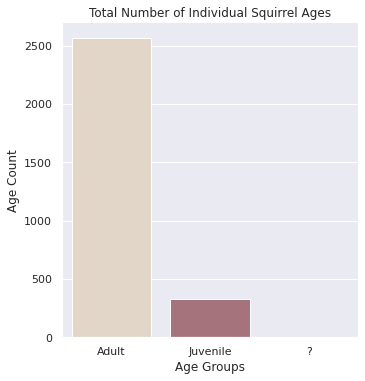

In [392]:
sns.set_theme(style = "darkgrid")
sns.catplot(x = "Age", kind = "count", palette = "ch:.25", data = df)
plt.xlabel('Age Groups')
plt.ylabel('Age Count')
plt.title('Total Number of Individual Squirrel Ages')
plt.show()

This plot shows that there are more adult squirrels sighted than baby squirrels. This can be due to human instinct, where humans can spot larger squirrels more easily than smaller squirrels.

### 4B. What is the geographic spread of squirrel color fur in Central Park, NY?

From the map in 3C, we can see mainly gray markers more than any other marker. From an observational analysis, we can observe that there are mostly squirrels with the primary fur color of gray rather squirrels of any other primary fur color. We can also see that there is no geographic pattern/correlation of squirrel fur color and location they were seen.

Lets plot up the entire dataset to see if our random sample was a good representation of the whole dataset. We can use seaborn to create a catplot of all squirrel's ages.

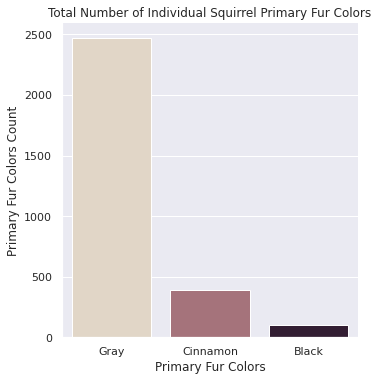

In [393]:
sns.set_theme(style = "darkgrid")
sns.catplot(x = "Primary Fur Color", kind = "count", palette = "ch:.25", data = df)
plt.xlabel('Primary Fur Colors')
plt.ylabel('Primary Fur Colors Count')
plt.title('Total Number of Individual Squirrel Primary Fur Colors')
plt.show()

This plot shows that there are more gray squirrels sighted than baby squirrels. This can be due to human instinct, where humans are more attentive to gray squirrels than squirrels of other fur colors.

### 4C. What is the most common time for squirrel sightings in Central Park, NY?

From the map in 3D, we can see there is a even distribution of orange and blue markers. From an observational analysis, we can observe that it is hard to tell whether or not there are more morning or night time sightings. There is no obvious trend or pattern, so we should plot up all sightings time to find the answer since the sample in the map does not represent the entire dataset well. 

We can use seaborn to create a catplot of all squirrel's ages.

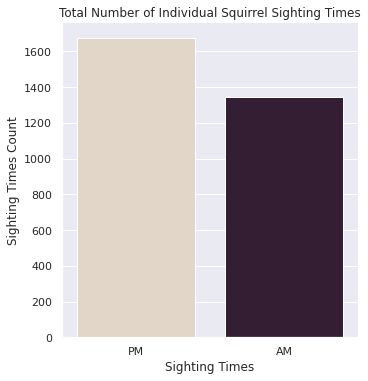

In [394]:
sns.set_theme(style = "darkgrid")
sns.catplot(x = "Shift", kind = "count", palette = "ch:.25", data = df)
plt.xlabel('Sighting Times')
plt.ylabel('Sighting Times Count')
plt.title('Total Number of Individual Squirrel Sighting Times')
plt.show()

This plot shows that there are more night time sightings rather than day time sightings. This can be due to the fact that there are more humans out at night than in the day time. This fits the sterotype of the city being named "the city that never sleeps."

### 4D. Is there a correlation between a squirrel's age and their actions (and/or interactions with humans)?

Since the map can only tell us so much about single variables, we should see if any variables have any correlation. We want to find out if any squirrels characteristics correlate with how they interact with humans or their actions.  

My hypothesis is that older squirrels will be found running more than younger squirrels, since they most likely see humans as a threat.

Another hypothesis is that younger squirrels will approach humans more than older squirrels since they are seeking food from a source.

My last hypothesis is that older squirrels will be found foraging more than younger squirrels since they are more indepedent on searching for food.

Lets create a correlation matrix to see if our hypothesis was true.

Then we can create a countplot using seaborn to visualize the results.

More info on correlation matrix: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

In [395]:
df.corr()

,X,Y,Date,Running,Chasing,Climbing,Foraging,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Runs from
X,1.000000,0.906838,0.104391,0.034092,-0.037457,0.011311,-0.006438,0.057685,0.057433,0.027252,0.003152,-0.008117,-0.038302,0.135509
Y,0.906838,1.000000,0.161824,0.041225,-0.015951,0.005565,-0.005280,0.063737,0.059990,0.022720,0.002229,-0.006876,-0.038296,0.157491
Date,0.104391,0.161824,1.000000,0.037451,0.024388,-0.070891,0.013283,0.024082,0.018114,0.029096,-0.034538,-0.015369,0.025829,0.051473
Running,0.034092,0.041225,0.037451,1.000000,0.025707,-0.055995,-0.220607,-0.006982,-0.012570,-0.017783,0.019521,0.029089,-0.016364,0.167285
Chasing,-0.037457,-0.015951,0.024388,0.025707,1.000000,-0.038022,-0.179526,0.060677,0.093064,0.026248,0.045055,0.022637,-0.040919,-0.061855
Climbing,0.011311,0.005565,-0.070891,-0.055995,-0.038022,1.000000,-0.297542,0.083457,0.019590,0.034294,-0.009952,-0.021641,-0.039993,0.048860
Foraging,-0.006438,-0.005280,0.013283,-0.220607,-0.179526,-0.297542,1.000000,-0.078581,-0.034980,-0.008922,-0.022759,0.058532,0.054887,-0.056925
Kuks,0.057685,0.063737,0.024082,-0.006982,0.060677,0.083457,-0.078581,1.000000,0.191233,-0.005890,0.064542,-0.003363,-0.015611,0.035680
Quaas,0.057433,0.059990,0.018114,-0.012570,0.093064,0.019590,-0.034980,0.191233,1.000000,0.078287,0.063930,-0.001319,-0.032438,-0.013767
Moans,0.027252,0.022720,0.029096,-0.017783,0.026248,0.034294,-0.008922,-0.005890,0.078287,1.000000,-0.007327,-0.012904,-0.007884,0.033428


This correlation matrix is hard to visualize, so lets make a heatmap using seaborn to represent the correlation matrix for easier visual analysis.

<AxesSubplot:>

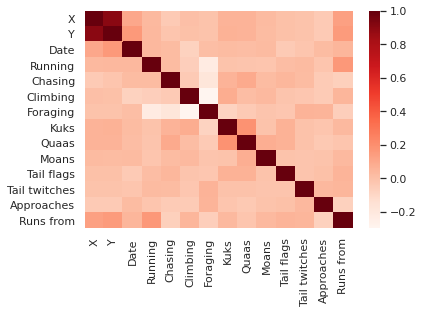

In [396]:
sns.heatmap(df.corr(), cmap = 'Reds')

Since the correlation matrix does not show age, lets visualize it differently. We can plot up categorical data with seaborn.

#### Hypothesis 1: Older squirrels will be found running more than younger squirrels because they most likely see humans as a threat.

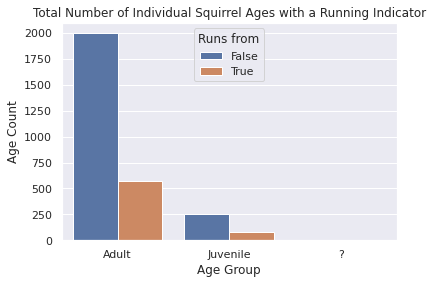

In [397]:
sns.set_theme(style = "darkgrid")
sns.countplot(x = "Age", hue = 'Runs from', data = df)
plt.xlabel('Age Group')
plt.ylabel('Age Count')
plt.title('Total Number of Individual Squirrel Ages with a Running Indicator')
plt.show()

We cannot tell from the countplot whether or not adults or baby squirrels tend to run away from humans more, so lets calculate the ratio for both. We want to find the total number of an age group, then total number of runners in the age group, then divide the runners from the total to find the ratio.

In [398]:
# Calculate the percentage of Adult Squirrels that were seen running away from humans
total_adults = len(np.where(df['Age'] == 'Adult')[0])
total_running_adults = len(np.where((df['Age'] == 'Adult') & (df['Runs from'] == True))[0])
running_adults_percentage = (total_running_adults/total_adults)

# Calculate the percentage of Baby Squirrels that were seen running away from humans
total_babies = len(np.where(df['Age'] == 'Juvenile')[0])
total_running_babies = len(np.where((df['Age'] == 'Juvenile') & (df['Runs from'] == True))[0])
running_babies_percentage = (total_running_babies/total_babies)

print("Percentage of Adult Squirrels that were seen running away from humans: {:.0%} \nPercentage of Baby Squirrels that were seen running away from humans: {:.0%} "
      .format(running_adults_percentage, running_babies_percentage))

Percentage of Adult Squirrels that were seen running away from humans: 22% 
Percentage of Baby Squirrels that were seen running away from humans: 25% 


As we can see, the results are a near close one. It seems that baby squirrels that were seen running were three percentage more than adults squirrels seen running. This means that more baby squirrels found humans as a threat than adult squirrels did in central park in 2018.

Therefore, my hypothesis was proven wrong.

#### Hypothesis 2: Younger squirrels will approach humans more than older squirrels because they are seeking food from a source.

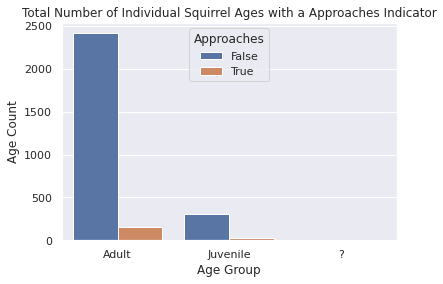

In [399]:
sns.set_theme(style = "darkgrid")
sns.countplot(x = "Age", hue = 'Approaches', data = df)
plt.xlabel('Age Group')
plt.ylabel('Age Count')
plt.title('Total Number of Individual Squirrel Ages with a Approaches Indicator')
plt.show()

From the countplot, it seems that more adult squirrels approach humans than baby squirrels do. Lets calculate the ratios to check to see if our observational analysis was correct.

In [400]:
# Calculate the percentage of Adult Squirrels that were seen approaching a human
total_adults = len(np.where(df['Age'] == 'Adult')[0])
total_approach_adults = len(np.where((df['Age'] == 'Adult') & (df['Approaches'] == True))[0])
approach_adults_percentage = (total_approach_adults/total_adults)

# Calculate the percentage of Baby Squirrels that were seen approaching a human
total_babies = len(np.where(df['Age'] == 'Juvenile')[0])
total_approach_babies = len(np.where((df['Age'] == 'Juvenile') & (df['Approaches'] == True))[0])
approach_babies_percentage = (total_approach_babies/total_babies)

print("Percentage of Adult Squirrels that were seen approaching a human: {:.0%} \nPercentage of Baby Squirrels that were seen approaching a human: {:.0%} "
      .format(approach_adults_percentage, approach_babies_percentage))


Percentage of Adult Squirrels that were seen approaching a human: 6% 
Percentage of Baby Squirrels that were seen approaching a human: 7% 


The results show that baby squirrels do have a higher percentage of approaching humans than adult squirrels do. This can be due to the fact that they had less time in the world, that can result in trusting others more for help. Also from being dependent on humans for food.

Therfore, my hypothesis was proven was correct.

#### Hypothesis 3: Older squirrels will be found foraging more than younger squirrels because they are more indepedent on searching for food.

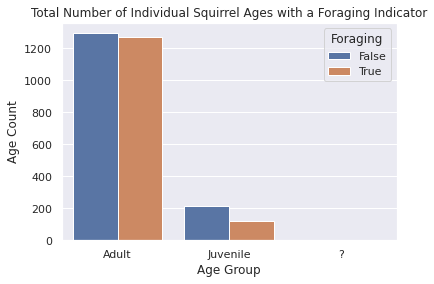

In [401]:
sns.set_theme(style = "darkgrid")
sns.countplot(x = "Age", hue = 'Foraging', data = df)
plt.xlabel('Age Group')
plt.ylabel('Age Count')
plt.title('Total Number of Individual Squirrel Ages with a Foraging Indicator')
plt.show()

From the countplot, it seems that more adult squirrels were seen foraging than baby squirrels did. Lets calculate the ratios to check to see if our observational analysis was correct.

In [402]:
# Calculate the percentage of Adult Squirrels that were seen foraging
total_adults = len(np.where(df['Age'] == 'Adult')[0])
total_approach_adults = len(np.where((df['Age'] == 'Adult') & (df['Foraging'] == True))[0])
approach_adults_percentage = (total_approach_adults/total_adults)

# Calculate the percentage of Baby Squirrels that were seen foraging
total_babies = len(np.where(df['Age'] == 'Juvenile')[0])
total_approach_babies = len(np.where((df['Age'] == 'Juvenile') & (df['Foraging'] == True))[0])
approach_babies_percentage = (total_approach_babies/total_babies)

print("Percentage of Adult Squirrels that were seen foraging: {:.0%} \nPercentage of Baby Squirrels that were seen foraging: {:.0%} "
      .format(approach_adults_percentage, approach_babies_percentage))


Percentage of Adult Squirrels that were seen foraging: 50% 
Percentage of Baby Squirrels that were seen foraging: 36% 


The results show that a much higher percentage of adult squirrels were found foraging than baby squirrels did. This can be due to many reasons, one of which is from my hypothesis that adult squirrels are more independent than baby squirrels are in regard to survival.

## Machine Learning

### 5A. Training the Data

Lets create a new dataframe with variables that we want to take into consideration for our predictive model. Since we have qualitative data, we have to transform the non-numerical labels to numerical labels. More information can be found here with the tool, Label Encoder, we will be using (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). We will also have to standardize our quantitative data by fitting and transforming it with the tool, Robust Scaler, with more info found here (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler.fit_transform). We will be using sklearn to train and build the models

In [403]:
# Transform non-numerical labels to numerical labels
new_df = pandas.DataFrame()
qualitative_data = ['Age', 'Primary Fur Color', 'Shift']
le = preprocessing.LabelEncoder()

for col in qualitative_data:
    new_df[col] = le.fit_transform(df[col])

# Standardize data
quantitative_data = ['X', 'Y', 'Date']
rc = RobustScaler()

new_df[quantitative_data] = rc.fit_transform(df[quantitative_data])

We can now split the data for our target values and data.

In [404]:
y = new_df['Primary Fur Color']
X = new_df.drop('Primary Fur Color', axis = 1)

We can now train our data as shown below. We will split our data into two parts training (70%), testing (30%).

In [405]:
# Train the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 17)

We will need these methods below to calculate the model accuracy and root mean squared error.

In [406]:
def get_model_accuracy(X, y, model):
    return model.score(X, y)

def get_model_rmse(y, y_model):
    return np.sqrt(mean_squared_error(y, y_model))

### 5B. Building the Model: K-Nearest Neighbors Classifier

We will be using a classifier since we are predicting primary fur color which is a categorical dataset, not numerical

In [407]:
# Only keep the scores of the best performing model
best_neigh_scores_model_accuracy = 0 

# [train_score, test_score, train_rmse, test_rmse]
best_scores = []

# Create a range of neighbors
n_neighbors = np.arange(1, 10)
    
# Choosing Hyper-parameters    
for n_neighbors_ in n_neighbors:
    
    # Create a K-Nearest Neighbors Classifier model 
    neigh = KNeighborsClassifier(n_neighbors = n_neighbors_)

    # Fit the Decision Tree Classifier from the training dataset
    neigh.fit(X_train, y_train)

    # Predict the target for the sample data
    y_test_neigh = neigh.predict(X_test)
    y_train_neigh = neigh.predict(X_train)

    # Return the coefficient of determination of the prediction
    score_train_neigh = get_model_accuracy(X_train, y_train, neigh)
    score_test_neigh = get_model_accuracy(X_test, y_test, neigh)

    # Return the root mean squared error
    rmse_train_neigh = get_model_rmse(y_train, y_train_neigh)
    rmse_test_neigh = get_model_rmse(y_test, y_test_neigh)
    
    # Compare for best test scores
    if score_test_neigh > best_neigh_scores_model_accuracy:
        
        best_neigh_scores_model_accuracy = score_test_neigh
        best_scores = [score_train_neigh, score_test_neigh, rmse_train_neigh, rmse_test_neigh]

# Print Results
description = "K-Nearest Neighbors Classifier Results:\nTrain Data Accuracy: {:.2%}" \
            + "\nTest Data Accuracy: {:.2%}" \
            + "\nTrain Data RMSE: {:.2%}" \
            + "\nTest Data RMSE: {:.2%}" 

print(str(description).format(best_scores[0], best_scores[1], best_scores[2], best_scores[3]))

K-Nearest Neighbors Classifier Results:
Train Data Accuracy: 83.95%
Test Data Accuracy: 79.86%
Train Data RMSE: 50.97%
Test Data RMSE: 55.37%


Based on the results, it seems that the accuracy of the training and test data did well. However, the training data out-performed the test data by 4%, this means that we overfitted the data.

### 5B. Building the Model: Decision Tree Classifier

In [408]:
# Only keep the scores of the best performing model
best_clf_scores_model_accuracy = 0 

#[train_score, test_score, train_rmse, test_rmse]
best_scores = []

# Create a range of max-depths
max_depth = np.arange(1, 10)
    
# Choosing Hyper-parameters
for max_depth_ in max_depth:
    
    # Create a Decision Tree Classifier model 
    clf = DecisionTreeClassifier(max_depth = max_depth_, random_state = 0)

    # Fit the Decision Tree Classifier from the training dataset
    clf.fit(X_train, y_train)

    # Predict the target for the sample data
    y_test_clf = clf.predict(X_test)
    y_train_clf = clf.predict(X_train)

    # Return the coefficient of determination of the prediction
    score_train_clf = get_model_accuracy(X_train, y_train, clf)
    score_test_clf = get_model_accuracy(X_test, y_test, clf)

    # Return the root mean squared error
    rmse_train_clf = get_model_rmse(y_train, y_train_clf)
    rmse_test_clf = get_model_rmse(y_test, y_test_clf)
    
    # Compare for best test scores
    if score_test_clf > best_clf_scores_model_accuracy:
        
        best_clf_scores_model_accuracy = score_test_clf
        best_scores = [score_train_clf, score_test_clf, rmse_train_clf, rmse_test_clf]

# Print Results
description = "Decision Tree Classifier Results:\nTrain Data Accuracy: {:.2%}" \
            + "\nTest Data Accuracy: {:.2%}" \
            + "\nTrain Data RMSE: {:.2%}" \
            + "\nTest Data RMSE: {:.2%}" 

print(str(description).format(best_scores[0], best_scores[1], best_scores[2], best_scores[3]))

Decision Tree Classifier Results:
Train Data Accuracy: 82.47%
Test Data Accuracy: 80.46%
Train Data RMSE: 52.96%
Test Data RMSE: 54.00%


Based on the results, it seems that the test data accuracy performed better than the previous model; however, the train data accuracy was a percentage lower than the previous model. There is not a big difference on performance for the train and test data; thus, we underfitted the data since it could be better and not as poor for both train and test data. With better hyper parameters or different models, we can improve these accuracy scores. Overall, the decision tree classifier was a better model compared to the K-Nearest Neighbors Classifier.

## 6. Conclusion

### 6A. Key Takeaways

Thank you for joining me for this tutorial! We learned how to view, load, and clean a dataset. We learned how to visualize a dataset on a map using folium with different icons and markers. We were then able to analyze the maps, and check our results by plotting up more than a sample with seaborn plots. We plotted up squrriel ages, fur colors, and sighting times! We were able to prove/disprove our hypothesis of squirrel ages, color fur spread, sighting times, and whether or not squirrel's age determine their actions with computations and visual analysis. Lastly we trained caterogial data, and built a K-Nearest Neighbors Classifier and Decision Tree Classifier to predict primary fur colors. Both models had an overall 80% accuracy which is an average performance. We saw that the decision tree classifier was an overall better model for our data
 

### 6B. Future Questions

- How else can we analyze squirrel data in the future?
- What other information in the sightings would be insightful for data analysis?
- How could we improve our data analysis process?
- How could we better improve our predictive model?